# 1. Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# 2. Loading the data

In [2]:
stores_data=pd.read_csv("stores.csv")
features_data=pd.read_csv("features.csv")
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")
print(stores_data.shape, features_data.shape, train_data.shape, test_data.shape)

(45, 3) (8190, 12) (421570, 5) (115064, 4)


# 3. EDA 🔍

## 3.1 Store Data

In [3]:
stores_data.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [4]:
stores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [5]:
print(stores_data['Store'].nunique())
print(stores_data['Type'].nunique())
print(stores_data['Size'].nunique())

45
3
40


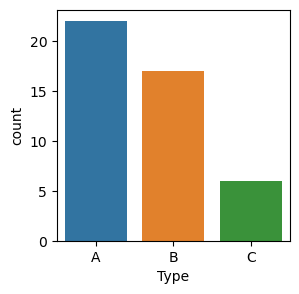

In [6]:
plt.figure(figsize=(3,3))
sns.countplot(x='Type', data=stores_data)
plt.show()

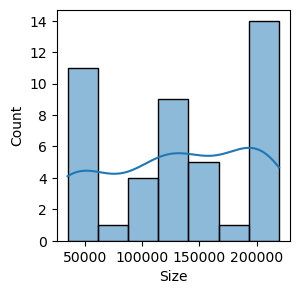

In [7]:
plt.figure(figsize=(3,3))
sns.histplot(data=stores_data, x='Size', kde=True)
plt.show()

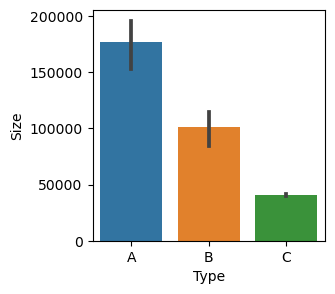

In [8]:
plt.figure(figsize=(3,3))
sns.barplot(x='Type', y='Size', data=stores_data)
plt.show()

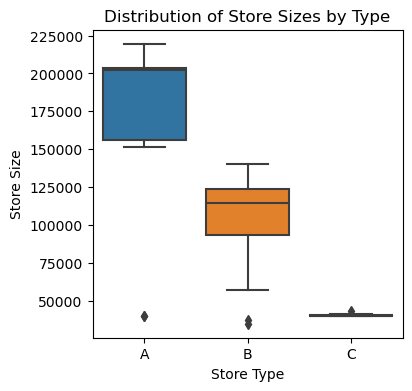

In [9]:
plt.figure(figsize=(4,4))
sns.boxplot(x='Type', y='Size', data=stores_data)
plt.xlabel('Store Type')
plt.ylabel('Store Size')
plt.title('Distribution of Store Sizes by Type')
plt.show()

## 3.2 Features Data

In [10]:
features_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [11]:
features_data.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [12]:
features_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


## 3.3 Train Data 

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [14]:
train_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


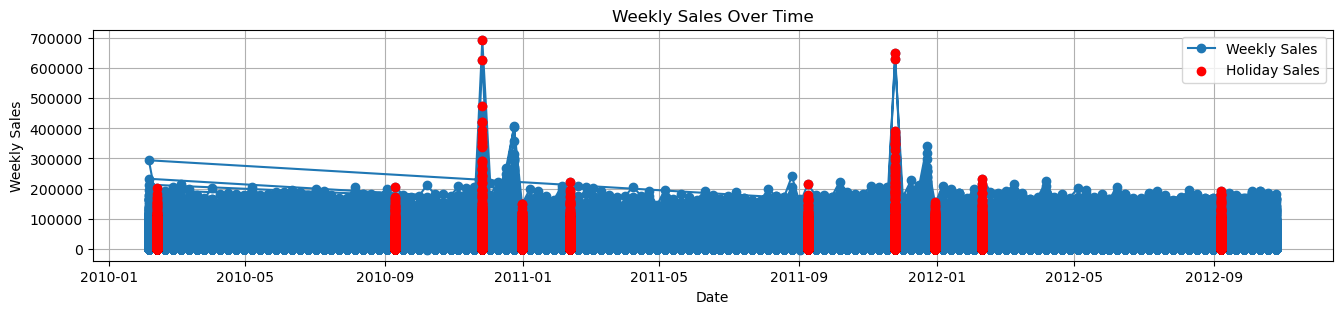

In [15]:
df=train_data.copy()
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(16, 3))
plt.plot(df['Date'], df['Weekly_Sales'], marker='o', linestyle='-', label='Weekly Sales')
holiday_sales = df[df['IsHoliday']]
plt.scatter(holiday_sales['Date'], holiday_sales['Weekly_Sales'], color='red', label='Holiday Sales', zorder=5)
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)

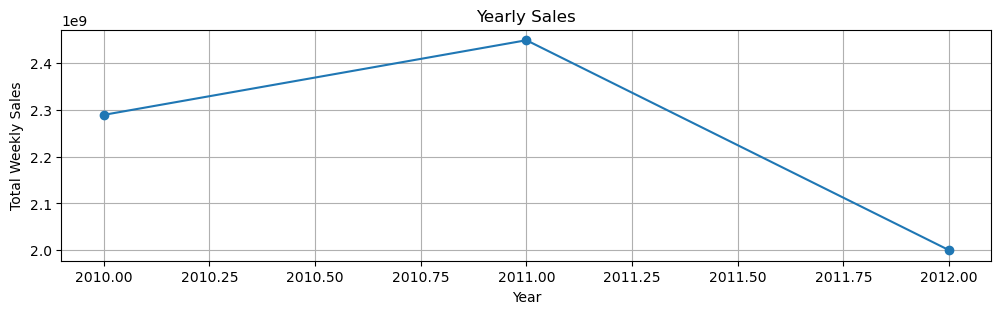

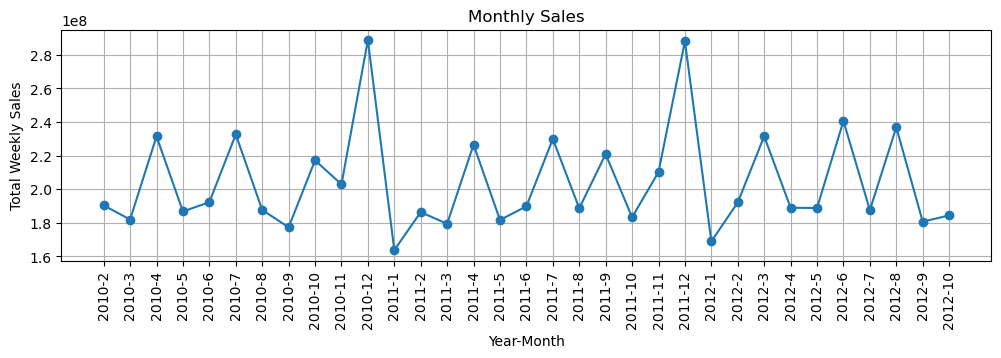

In [16]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
yearly_sales = df.groupby('Year')['Weekly_Sales'].sum().reset_index()
monthly_sales = df.groupby(['Year', 'Month'])['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(12,3))
plt.plot(yearly_sales['Year'], yearly_sales['Weekly_Sales'], marker='o')
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Weekly Sales')
plt.grid(True)
plt.show()


plt.figure(figsize=(12,3))
monthly_sales['Year-Month'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str)
plt.plot(monthly_sales['Year-Month'], monthly_sales['Weekly_Sales'], marker='o')
plt.title('Monthly Sales')
plt.xlabel('Year-Month')
plt.ylabel('Total Weekly Sales')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

👉 It seems the first quarter of 2011 has the highest weekly sales, and December also shows high sales.

## 3.4 Test Data

In [17]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [18]:
test_data.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


# 4. Data Preprocessing

## 4.1 Feature Engineering

In [19]:
features_data.loc[(features_data['MarkDown1'].isnull()==True),'MarkDown1'] = 0
features_data.loc[(features_data['MarkDown2'].isnull()==True),'MarkDown2'] = 0
features_data.loc[(features_data['MarkDown3'].isnull()==True),'MarkDown3'] = 0
features_data.loc[(features_data['MarkDown4'].isnull()==True),'MarkDown4'] = 0
features_data.loc[(features_data['MarkDown5'].isnull()==True),'MarkDown5'] = 0
features_data['Markdown'] = features_data['MarkDown1']+features_data['MarkDown2']+features_data['MarkDown3']+features_data['MarkDown4']+features_data['MarkDown5']
features_data.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], inplace=True)
features_data.drop_duplicates()
features_data.shape

(8190, 8)

In [20]:
data=pd.merge(train_data, stores_data, on ='Store')
data=pd.merge(data, features_data, on= ['Store', 'Date', 'IsHoliday'])
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Markdown
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,0.0
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,211.096358,8.106,0.0
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,211.096358,8.106,0.0
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,211.096358,8.106,0.0
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,211.096358,8.106,0.0


In [21]:
test=pd.merge(test_data, stores_data, on ='Store')
test=pd.merge(test, features_data, on= ['Store', 'Date', 'IsHoliday'])
test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Markdown
0,1,1,2012-11-02,False,A,151315,55.32,3.386,223.462779,6.573,18342.28
1,1,2,2012-11-02,False,A,151315,55.32,3.386,223.462779,6.573,18342.28
2,1,3,2012-11-02,False,A,151315,55.32,3.386,223.462779,6.573,18342.28
3,1,4,2012-11-02,False,A,151315,55.32,3.386,223.462779,6.573,18342.28
4,1,5,2012-11-02,False,A,151315,55.32,3.386,223.462779,6.573,18342.28


In [22]:
print(data.shape, test.shape)

(421570, 12) (115064, 11)


In [23]:
data['Date']=pd.to_datetime(data['Date'])  
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data = pd.get_dummies(data, columns=['Type', 'IsHoliday'])
test['Date']=pd.to_datetime(test['Date'])  
test['Month'] = test['Date'].dt.month
test['Year'] = test['Date'].dt.year
test = pd.get_dummies(test, columns=['Type', 'IsHoliday'])
print(data.shape, test.shape)

(421570, 17) (115064, 16)


In [24]:
data = data.drop(['Date'], axis=1)
test = test.drop(['Date'], axis=1)
print(data.shape, test.shape)

(421570, 16) (115064, 15)


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Store            421570 non-null  int64  
 1   Dept             421570 non-null  int64  
 2   Weekly_Sales     421570 non-null  float64
 3   Size             421570 non-null  int64  
 4   Temperature      421570 non-null  float64
 5   Fuel_Price       421570 non-null  float64
 6   CPI              421570 non-null  float64
 7   Unemployment     421570 non-null  float64
 8   Markdown         421570 non-null  float64
 9   Month            421570 non-null  int64  
 10  Year             421570 non-null  int64  
 11  Type_A           421570 non-null  uint8  
 12  Type_B           421570 non-null  uint8  
 13  Type_C           421570 non-null  uint8  
 14  IsHoliday_False  421570 non-null  uint8  
 15  IsHoliday_True   421570 non-null  uint8  
dtypes: float64(6), int64(5), uint8(5)
memo

In [26]:
num_data = data.select_dtypes(include=['number'])
corr_matrix=num_data.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,Markdown,Month,Year,Type_A,Type_B,Type_C,IsHoliday_False,IsHoliday_True
Store,1.000000,0.024004,-0.085195,-0.182881,-0.050097,0.065290,-0.211088,0.208552,-0.058667,0.001011,0.002997,-0.037119,-0.233461,0.439004,0.000548,-0.000548
Dept,0.024004,1.000000,0.148032,-0.002966,0.004437,0.003572,-0.007477,0.007837,0.002641,0.000904,0.003738,0.012134,-0.029968,0.028324,-0.000916,0.000916
Weekly_Sales,-0.085195,0.148032,1.000000,0.243828,-0.002312,-0.000120,-0.020921,-0.025864,0.065237,0.028409,-0.010111,0.185417,-0.131219,-0.095388,-0.012774,0.012774
Size,-0.182881,-0.002966,0.243828,1.000000,-0.058313,0.003361,-0.003314,-0.068238,0.186552,-0.001210,-0.004975,0.762998,-0.455646,-0.528852,-0.000593,0.000593
Temperature,-0.050097,0.004437,-0.002312,-0.058313,1.000000,0.143859,0.182112,0.096730,-0.111253,0.235983,0.065814,0.024493,-0.109032,0.135651,0.155949,-0.155949
Fuel_Price,0.065290,0.003572,-0.000120,0.003361,0.143859,1.000000,-0.164210,-0.033853,0.244348,-0.040876,0.779633,-0.037973,0.037317,0.002652,0.078281,-0.078281
CPI,-0.211088,-0.007477,-0.020921,-0.003314,0.182112,-0.164210,1.000000,-0.299953,0.019894,0.005282,0.074544,0.083739,-0.081817,-0.006615,0.001944,-0.001944
Unemployment,0.208552,0.007837,-0.025864,-0.068238,0.096730,-0.033853,-0.299953,1.000000,-0.118753,-0.012444,-0.237161,-0.092574,-0.013435,0.175263,-0.010460,0.010460
Markdown,-0.058667,0.002641,0.065237,0.186552,-0.111253,0.244348,0.019894,-0.118753,1.000000,-0.011749,0.457059,0.105707,-0.024444,-0.135807,-0.168700,0.168700
Month,0.001011,0.000904,0.028409,-0.001210,0.235983,-0.040876,0.005282,-0.012444,-0.011749,1.000000,-0.194288,0.000037,0.000019,-0.000092,-0.123376,0.123376


In [27]:
data.isnull().sum()

Store              0
Dept               0
Weekly_Sales       0
Size               0
Temperature        0
Fuel_Price         0
CPI                0
Unemployment       0
Markdown           0
Month              0
Year               0
Type_A             0
Type_B             0
Type_C             0
IsHoliday_False    0
IsHoliday_True     0
dtype: int64

In [28]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Size,421570.0,136727.915739,60980.583328,34875.000,93638.000000,140167.00000,202505.000000,219622.000000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
CPI,421570.0,171.201947,39.159276,126.064,132.022667,182.31878,212.416993,227.232807
Unemployment,421570.0,7.960289,1.863296,3.879,6.891000,7.86600,8.572000,14.313000
Markdown,421570.0,6684.041435,14750.941552,0.000,0.000000,0.00000,8075.260000,160510.610000
Month,421570.0,6.449510,3.243217,1.000,4.000000,6.00000,9.000000,12.000000


In [29]:
df=data.copy()
df['Positive_Sales'] = df['Weekly_Sales'].apply(lambda x: x if x >= 0 else 0)
df['Negative_Sales'] = df['Weekly_Sales'].apply(lambda x: x if x < 0 else 0)
df.head()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,Markdown,Month,Year,Type_A,Type_B,Type_C,IsHoliday_False,IsHoliday_True,Positive_Sales,Negative_Sales
0,1,1,24924.50,151315,42.31,2.572,211.096358,8.106,0.0,2,2010,1,0,0,1,0,24924.50,0.0
1,1,2,50605.27,151315,42.31,2.572,211.096358,8.106,0.0,2,2010,1,0,0,1,0,50605.27,0.0
2,1,3,13740.12,151315,42.31,2.572,211.096358,8.106,0.0,2,2010,1,0,0,1,0,13740.12,0.0
3,1,4,39954.04,151315,42.31,2.572,211.096358,8.106,0.0,2,2010,1,0,0,1,0,39954.04,0.0
4,1,5,32229.38,151315,42.31,2.572,211.096358,8.106,0.0,2,2010,1,0,0,1,0,32229.38,0.0


In [30]:
negative_sales_rows = df[df['Negative_Sales'] < 0]
print(len(negative_sales_rows))

1285


In [31]:
data.loc[data['Weekly_Sales'] < 0, 'Weekly_Sales'] = 0

In [32]:
null = data[(data['Weekly_Sales']==0)]
null.shape

(1358, 16)

In [33]:
null[null['IsHoliday_True']==1]

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,Markdown,Month,Year,Type_A,Type_B,Type_C,IsHoliday_False,IsHoliday_True
13282,2,47,0.0,202307,62.98,2.735,211.406287,8.163,0.00,11,2010,1,0,0,0,1
17370,2,47,0.0,202307,44.57,3.129,219.177306,7.441,105528.00,12,2011,1,0,0,0,1
43150,5,59,0.0,34875,38.25,3.022,213.494463,6.634,0.00,2,2011,0,1,0,0,1
46078,5,77,0.0,34875,45.62,3.129,220.117823,6.300,20465.25,12,2011,0,1,0,0,1
46456,5,59,0.0,34875,48.57,3.409,220.849586,5.943,13884.29,2,2012,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412054,45,80,0.0,118221,27.73,2.773,181.982317,8.992,0.00,2,2010,0,1,0,0,1
414023,45,18,0.0,118221,70.87,2.699,182.598178,8.743,0.00,9,2010,0,1,0,0,1
415525,45,47,0.0,118221,30.30,3.239,183.701613,8.549,0.00,2,2011,0,1,0,0,1
415526,45,49,0.0,118221,30.30,3.239,183.701613,8.549,0.00,2,2011,0,1,0,0,1


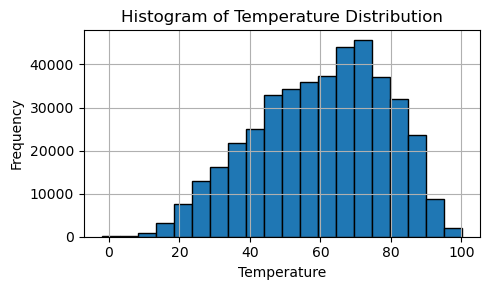

In [34]:
plt.figure(figsize=(5, 3))
plt.hist(data['Temperature'], bins=20, edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature Distribution')
plt.grid(True)
plt.tight_layout()
plt.show()


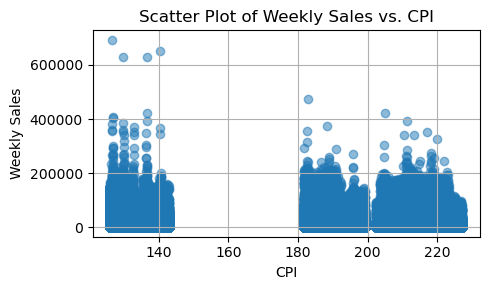

In [35]:
plt.figure(figsize=(5, 3))
plt.scatter(data['CPI'], data['Weekly_Sales'], alpha=0.5)
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.title('Scatter Plot of Weekly Sales vs. CPI')
plt.grid(True)
plt.tight_layout()
plt.show()

👉 Higher CPI may correspond to lower consumer spending and hence lower Weekly Sales, whereas lower CPI  may indicate higher consumer spending and potentially higher Weekly Sales.

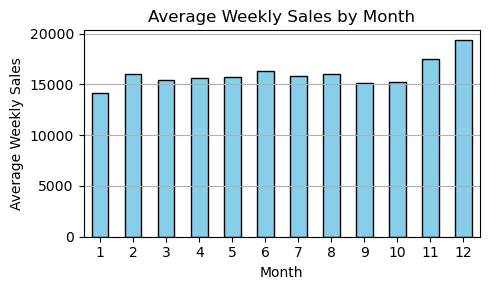

In [36]:
avg_sales_by_month = data.groupby('Month')['Weekly_Sales'].mean()

plt.figure(figsize=(5,3))
avg_sales_by_month.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales by Month')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

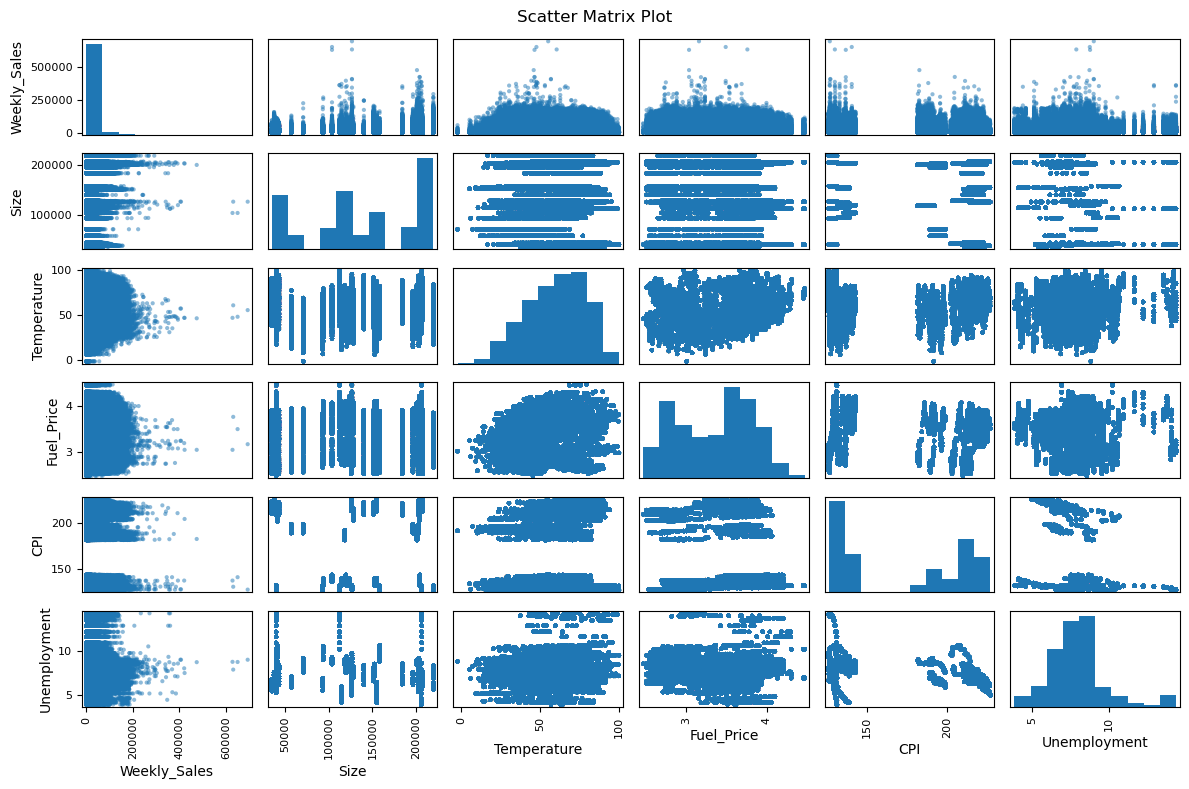

In [37]:
from pandas.plotting import scatter_matrix

attributes = ['Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
scatter_matrix(data[attributes], figsize=(12, 8))
plt.suptitle('Scatter Matrix Plot')
plt.tight_layout()
plt.show()

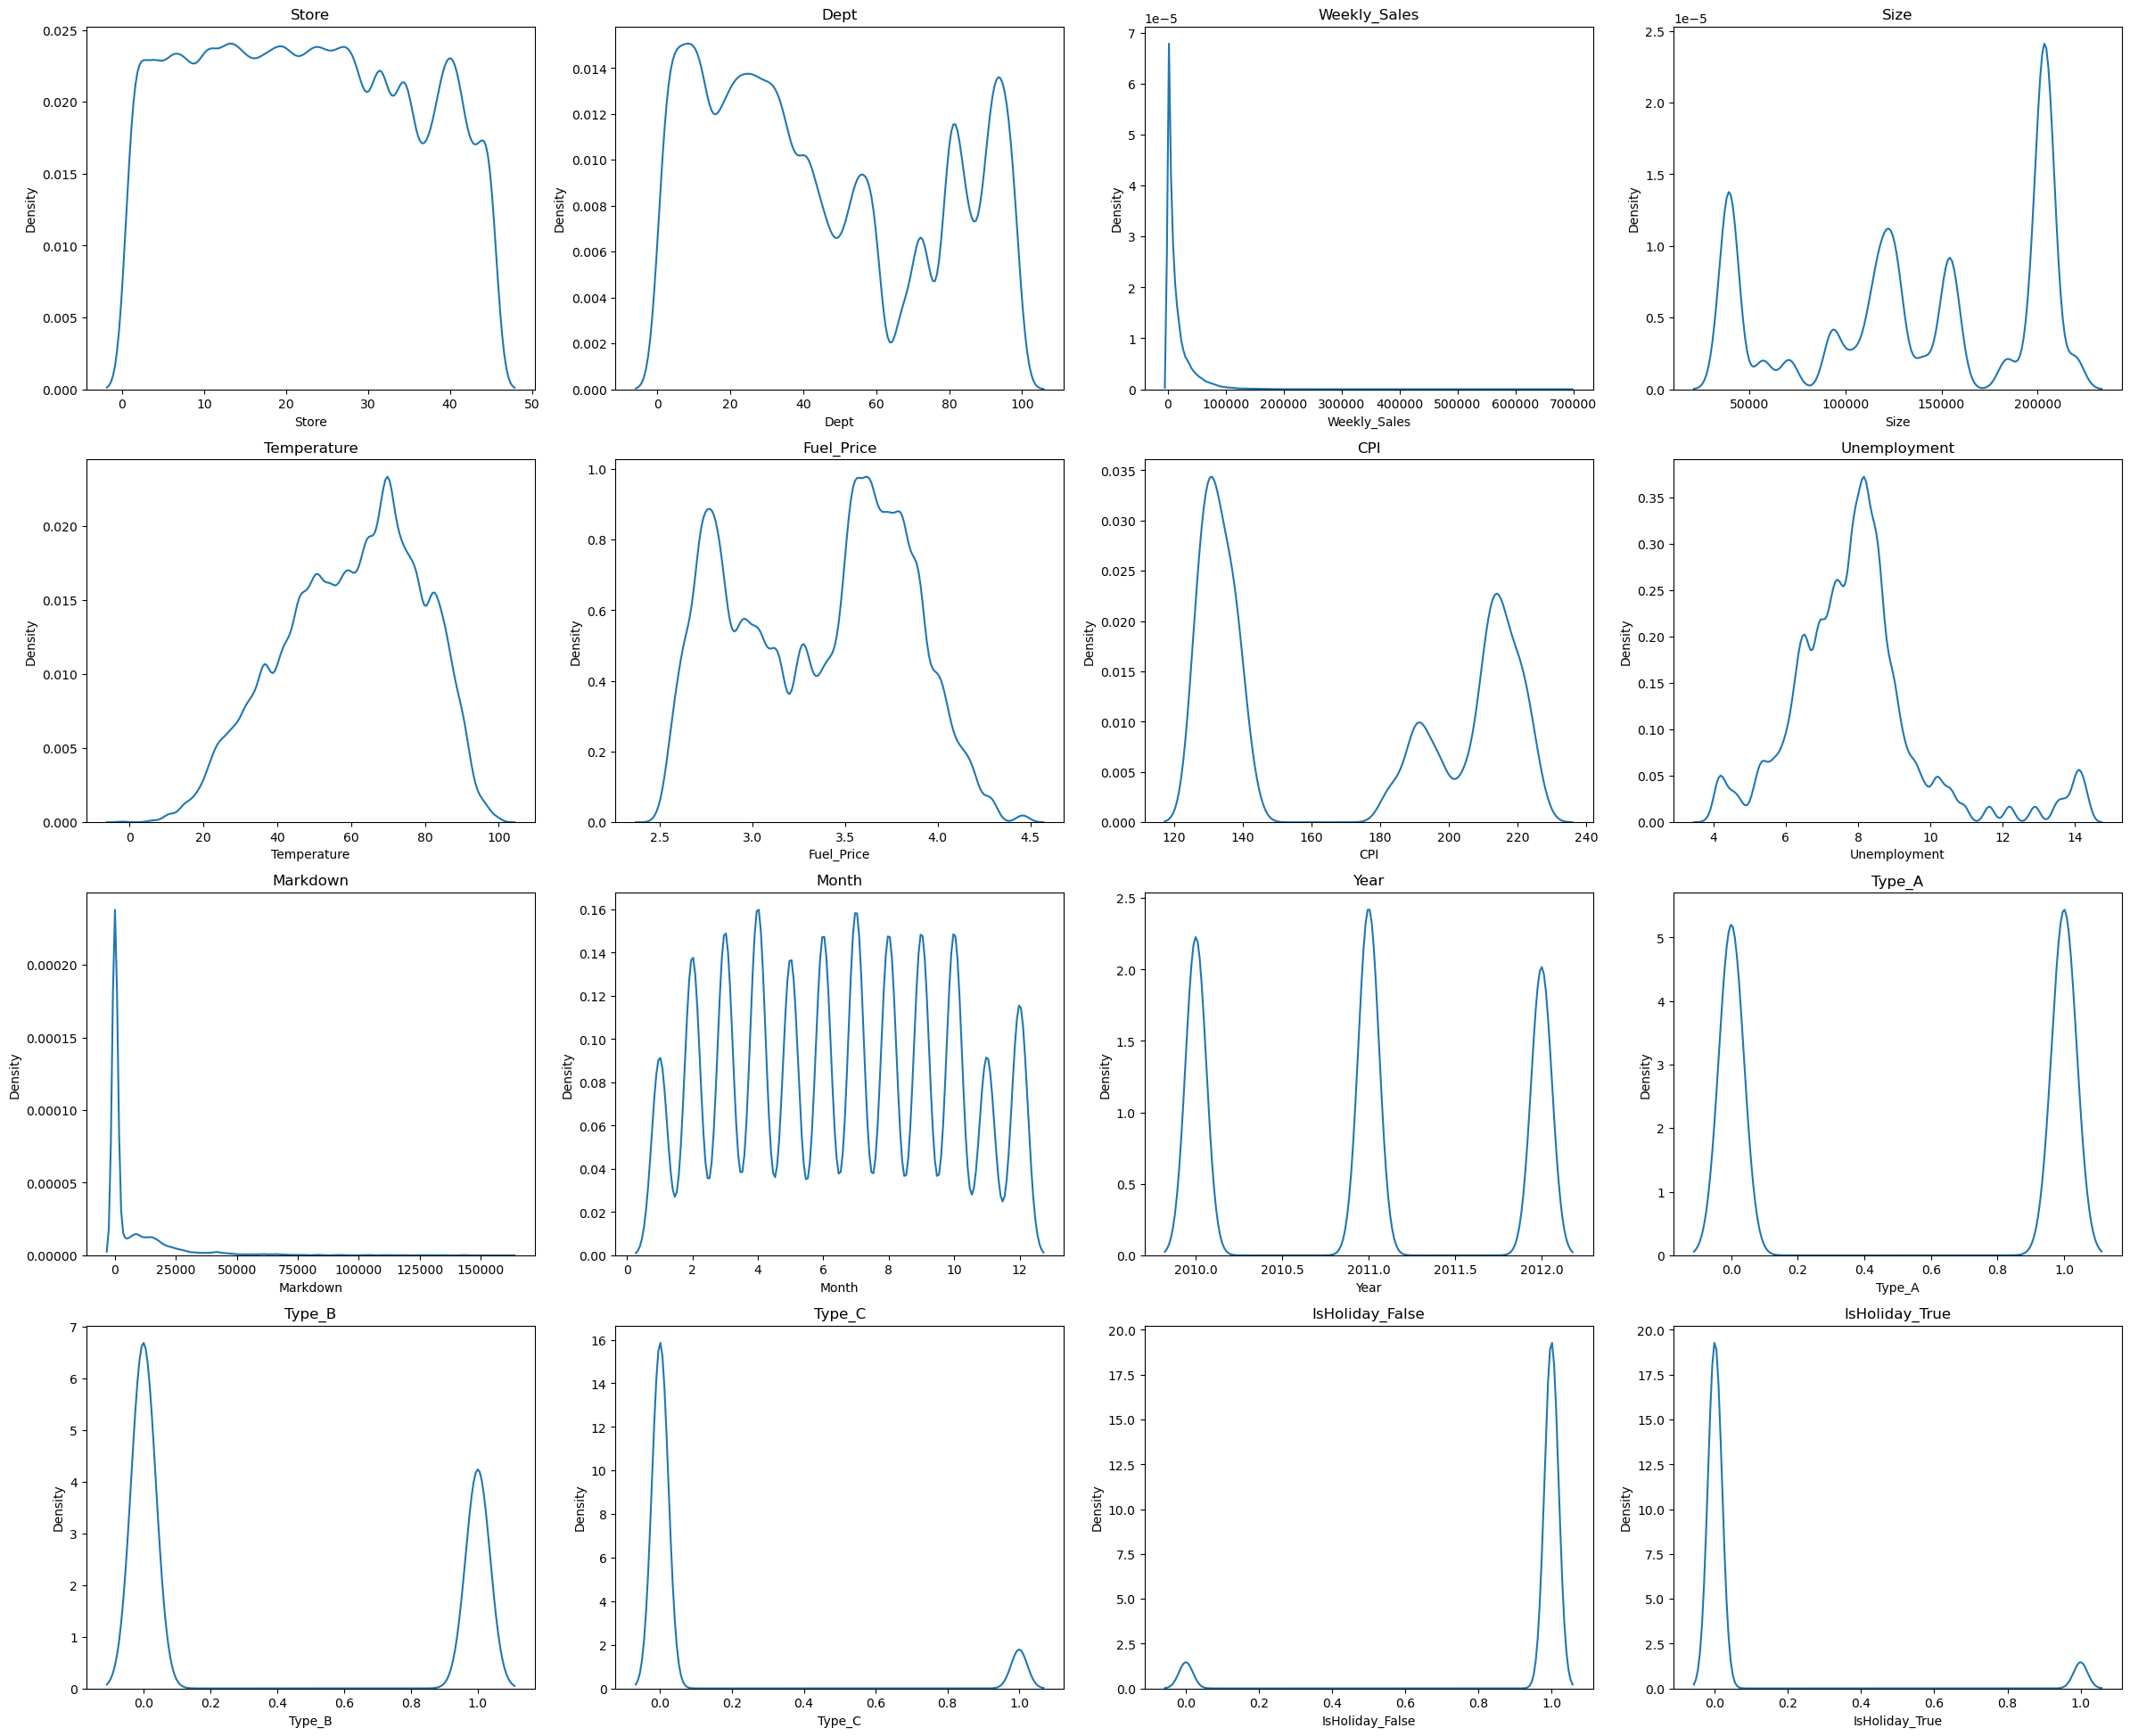

In [38]:
plt.figure(figsize=(24,24))
for i, col in enumerate(data.columns, 1):
    plt.subplot(5, 4, i)
    sns.kdeplot(x=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

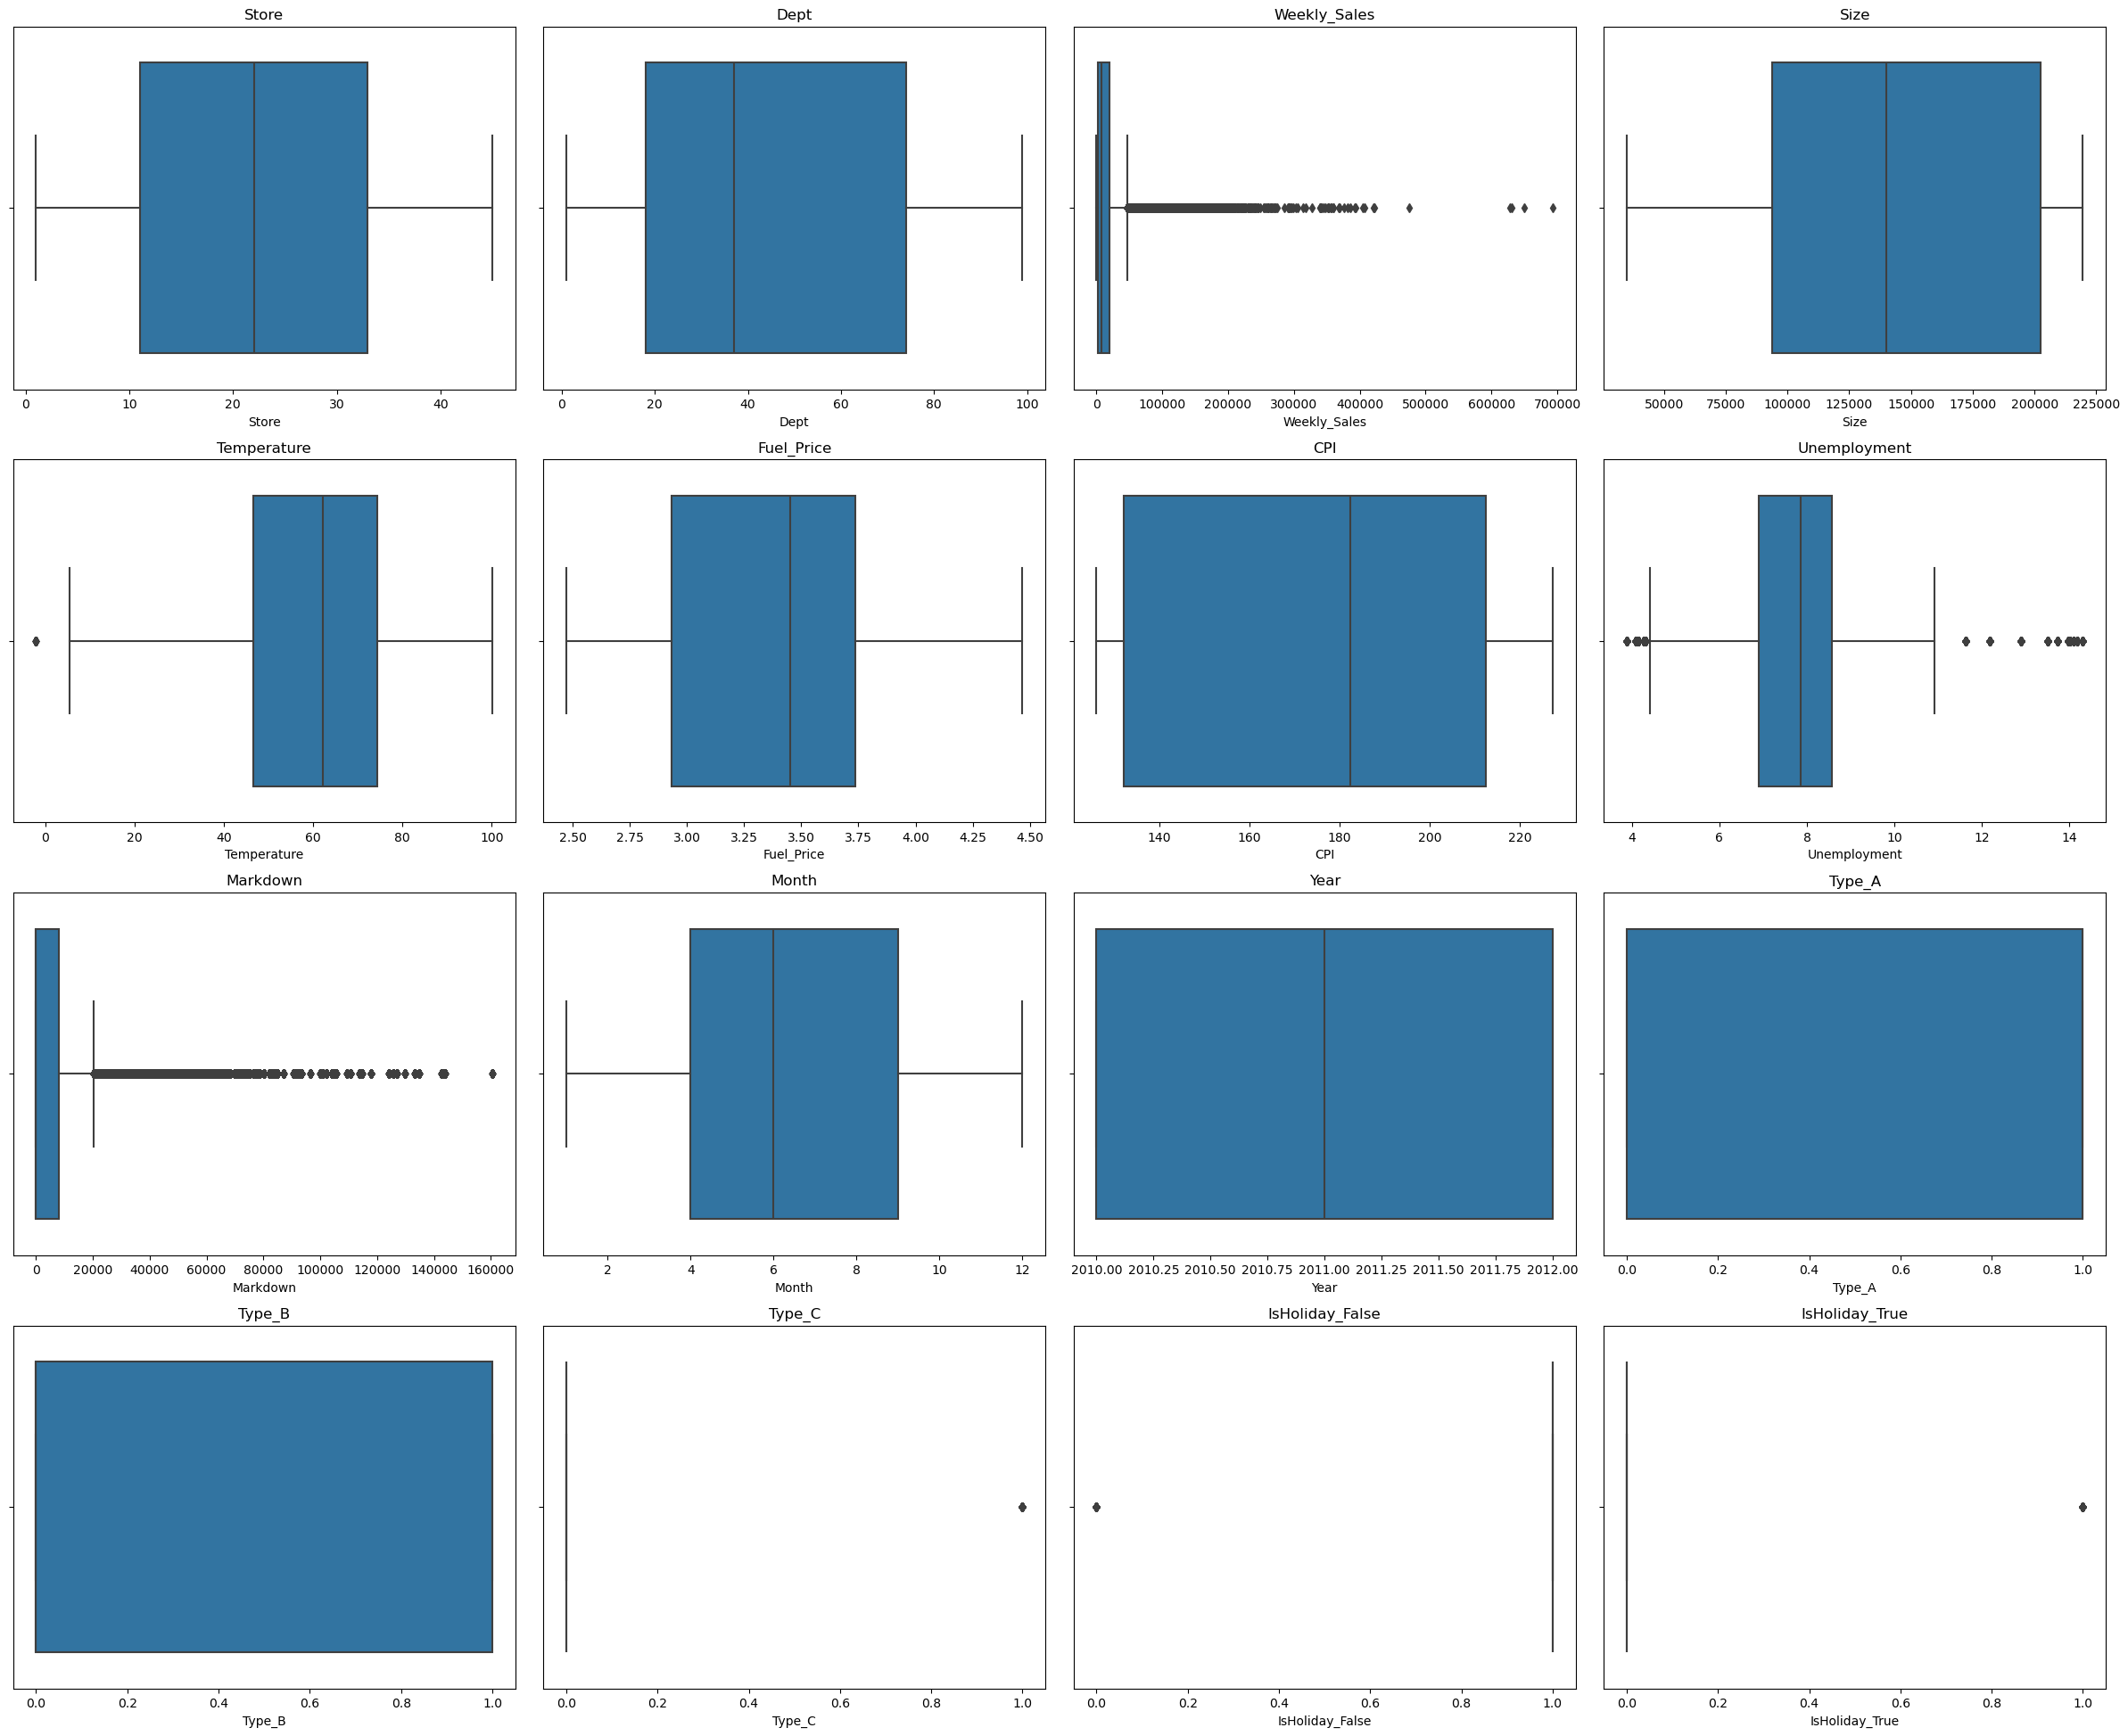

In [39]:
plt.figure(figsize=(24,24))
for i, col in enumerate(data.columns, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(x=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

## 4.2 Visualizing and Identifying Outliers

Threshold: 2, Outliers detected: 20913


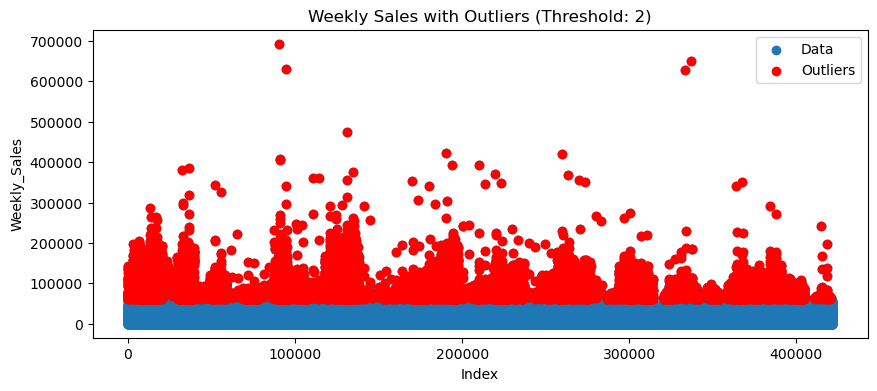

Threshold: 3, Outliers detected: 8848


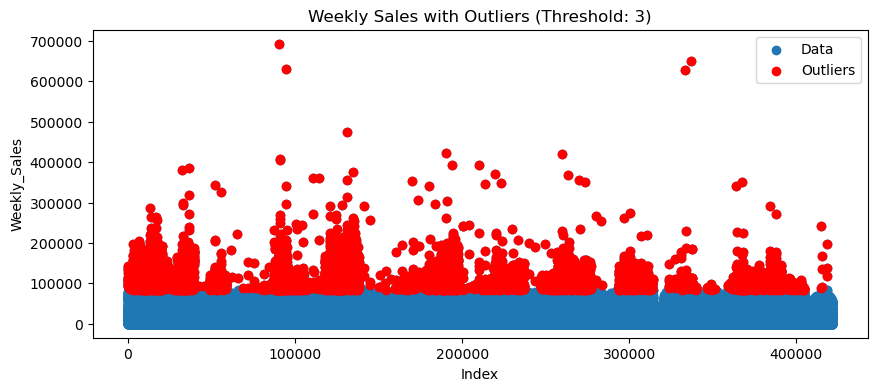

Threshold: 5, Outliers detected: 2161


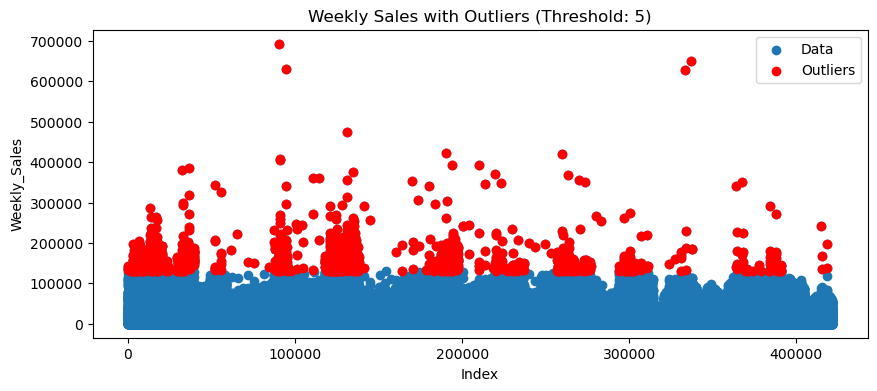

Threshold: 7, Outliers detected: 420


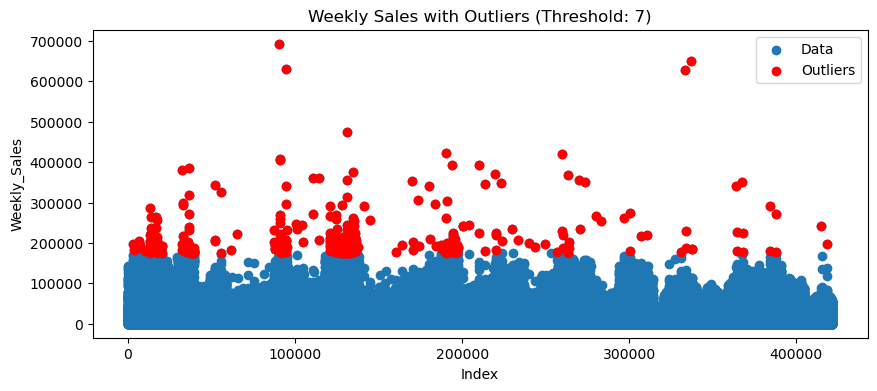

In [40]:
df=data.copy()
df['z_score'] = np.abs(stats.zscore(data['Weekly_Sales']))

thresholds = [2, 3, 5 ,7]

for threshold in thresholds:
    outliers = df[df['z_score'] > threshold]
    df_cleaned = df[df['z_score'] <= threshold]
    print(f'Threshold: {threshold}, Outliers detected: {len(outliers)}')

    plt.figure(figsize=(10, 4))
    plt.scatter(df.index, df['Weekly_Sales'], label='Data')
    plt.scatter(outliers.index, outliers['Weekly_Sales'], color='r', label='Outliers')
    plt.title(f'Weekly Sales with Outliers (Threshold: {threshold})')
    plt.xlabel('Index')
    plt.ylabel('Weekly_Sales')
    plt.legend()
    plt.show()

## 4.3 Handling Outliers

In [41]:
df_new = df[df['z_score'] <= 5]
df_new.drop(columns=['z_score'], inplace=True)
df_new.shape

C:\Users\91733\AppData\Local\Temp\ipykernel_4976\3930435716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(columns=['z_score'], inplace=True)


(419409, 16)

In [42]:
df_new.head()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,Markdown,Month,Year,Type_A,Type_B,Type_C,IsHoliday_False,IsHoliday_True
0,1,1,24924.50,151315,42.31,2.572,211.096358,8.106,0.0,2,2010,1,0,0,1,0
1,1,2,50605.27,151315,42.31,2.572,211.096358,8.106,0.0,2,2010,1,0,0,1,0
2,1,3,13740.12,151315,42.31,2.572,211.096358,8.106,0.0,2,2010,1,0,0,1,0
3,1,4,39954.04,151315,42.31,2.572,211.096358,8.106,0.0,2,2010,1,0,0,1,0
4,1,5,32229.38,151315,42.31,2.572,211.096358,8.106,0.0,2,2010,1,0,0,1,0


# 5. Model Building

In [43]:
X = df_new.drop('Weekly_Sales', axis=1)
y = df_new['Weekly_Sales']
scaler = MinMaxScaler()
X_new = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(335527, 15) (335527,) (83882, 15) (83882,)


In [44]:
X_train

array([[0.13636364, 0.83673469, 0.19398421, ..., 0.        , 1.        ,
        0.        ],
       [0.13636364, 0.23469388, 0.19398421, ..., 0.        , 1.        ,
        0.        ],
       [0.84090909, 0.90816327, 0.02606267, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.29545455, 0.91836735, 0.89865059, ..., 0.        , 1.        ,
        0.        ],
       [0.34090909, 0.56122449, 0.1208247 , ..., 0.        , 1.        ,
        0.        ],
       [0.27272727, 0.08163265, 1.        , ..., 0.        , 1.        ,
        0.        ]])

In [45]:
models = {
    'Decision Tree': DecisionTreeRegressor(max_depth=14, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boost': GradientBoostingRegressor(),
    'XGB' : xgb.XGBRegressor(objective='reg:squarederror', learning_rate = 0.1, max_depth = 6),
    'ExtraTree': ExtraTreeRegressor(random_state=42,max_depth=100,min_samples_split=5)
}

# 6. Model Evaluation

In [46]:
results = pd.DataFrame(columns=['Model', 'Train_R2', 'Train_MSE', 'Train_RMSE'])
for model_name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_train)
    
    r2 = r2_score(y_train, pred)
    mse = mean_squared_error(y_train, pred)
    rmse = np.sqrt(mse)
    
    new_row = {'Model': model_name, 'Train_R2': r2, 'Train_MSE': mse, 'Train_RMSE': rmse}
    results = pd.concat([results, pd.DataFrame([new_row])], ignore_index=True)

print(results)

            Model  Train_R2        Train_MSE    Train_RMSE
0   Decision Tree  0.956927  17222286.804956   4149.974314
1   Random Forest  0.996029   1587849.563675   1260.099029
2  Gradient Boost  0.746594  101322497.27098  10065.907672
3             XGB  0.905971  37596688.548144   6131.613862
4       ExtraTree  0.989022      4389295.012   2095.064441


In [47]:
results = pd.DataFrame(columns=['Model', 'R2', 'MSE', 'RMSE'])
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    new_row = {'Model': model_name, 'R2': r2, 'MSE': mse, 'RMSE': rmse}
    results = pd.concat([results, pd.DataFrame([new_row])], ignore_index=True)

print(results)

            Model        R2               MSE          RMSE
0   Decision Tree  0.940516    23986716.82534    4897.62359
1   Random Forest  0.970678   11824026.424249    3438.60821
2  Gradient Boost  0.744755  102926799.982853  10145.284618
3             XGB  0.901615   39673582.877429   6298.696919
4       ExtraTree  0.951232   19665478.528246   4434.577604


In [48]:
model=RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# 7. Model Deployment

In [49]:
test_df=pd.DataFrame(scaler.transform(test))
y_test_pred=model.predict(test_df)
test1=test_data.copy()
test1['Weekly_Sales_Prediction'] = y_test_pred
test1.to_csv('Sales_Prediction_trial1.csv', index=False)
print(test1.head())

   Store  Dept        Date  IsHoliday  Weekly_Sales_Prediction
0      1     1  2012-11-02      False               28151.4734
1      1     1  2012-11-09      False               45446.4385
2      1     1  2012-11-16      False               10402.5534
3      1     1  2012-11-23       True               38926.7326
4      1     1  2012-11-30      False               30830.0767
